In [1]:
# !pip install -e /files/shared/ap/jupyter-notebook/pkgs/objFuncs --break-system-packages
# !pip install -e /files/shared/ap/jupyter-notebook/pkgs/pyBO --break-system-packages

In [2]:
# !pip install -e /files/shared/ap/jupyter-notebook/pkgs/objFuncs
# !pip install -e /files/shared/ap/jupyter-notebook/pkgs/pyBO

In [3]:
# !pip install -e ../../objFuncs
# !pip install -e ../../pyBO

In [4]:
budget = 40

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import concurrent

In [6]:
import objFuncs
from objFuncs import VM
from objFuncs import objFuncGoals
from objFuncs.preset import get_preset
from objFuncs import construct_machineIO

objFuncs version: 1.0.3. updated on 2024-03-11
flame_utils is not importable. ignoreing this feature...


In [7]:
from pyBO import pyBO

pyBO version: 1.0.1. updated on 2024-03-15


# construct VM

In [8]:
preset = get_preset('[MEBT]FC1102')
preset

{'decision_CSETs': ['FE_LEBT:PSC2_D0929:I_CSET',
  'FE_LEBT:PSD1_D0936:V_CSET',
  'FE_LEBT:PSC2_D0948:I_CSET',
  'FE_LEBT:PSC1_D0948:I_CSET',
  'FE_LEBT:PSC2_D0979:I_CSET',
  'FE_LEBT:PSC1_D0979:I_CSET'],
 'decision_min': [nan, nan, nan, nan, nan, nan],
 'decision_max': [nan, nan, nan, nan, nan, nan],
 'decision_tol': 1.2000000000000002,
 'objective_goal': {'FE_MEBT:BPM_D1056:XPOS_RD': 0,
  'FE_MEBT:BPM_D1056:YPOS_RD': 0,
  'FE_MEBT:BCM_D1055:AVGPK_RD': {'more than': 50},
  'FE_MEBT:FC_D1102:PKAVG_RD': {'more than': 40.0}},
 'objective_weight': {'FE_MEBT:BPM_D1056:XPOS_RD': 1,
  'FE_MEBT:BPM_D1056:YPOS_RD': 1,
  'FE_MEBT:BCM_D1055:AVGPK_RD': 1,
  'FE_MEBT:FC_D1102:PKAVG_RD': 1},
 'objective_norm': {'FE_MEBT:BPM_D1056:XPOS_RD': 1,
  'FE_MEBT:BPM_D1056:YPOS_RD': 1,
  'FE_MEBT:BCM_D1055:AVGPK_RD': 2.5,
  'FE_MEBT:FC_D1102:PKAVG_RD': 2.0000000000000004}}

In [9]:
preset['decision_min'] = -5
preset['decision_max'] =  5

In [10]:
vm = VM(
        x0 = np.zeros(len(preset['decision_CSETs'])),
        decision_CSETs = preset['decision_CSETs'],
        decision_min   = preset['decision_min'],
        decision_max   = preset['decision_max'],
        objective_RDs  = list(preset['objective_goal'].keys()),
        objective_RDs_mean = [list({'more than': 40.0}.values())[0] if isinstance(val, dict) else val 
                              for val in preset['objective_goal'].values()],
        objective_RDs_std  = [val for val in preset['objective_norm'].values()],
        )

In [11]:
machineIO = construct_machineIO()
machineIO._ensure_set = vm.ensure_set
machineIO._fetch_data = vm.fetch_data
machineIO._caget      = vm.caget
machineIO._caput      = vm.caput
machineIO._test       = True

In [12]:
obj = objFuncGoals(  
    **preset,
    machineIO = machineIO
    )

======== class info ========
init_time: 2024-03-21 16:09:37.382684
class_hierarchy: [
    objFuncGoals, objFuncBase]
machineIO: not picklable
decision_CSETs: [
    FE_LEBT:PSC2_D0929:I_CSET, FE_LEBT:PSD1_D0936:V_CSET, FE_LEBT:PSC2_D0948:I_CSET
    FE_LEBT:PSC1_D0948:I_CSET, FE_LEBT:PSC2_D0979:I_CSET, FE_LEBT:PSC1_D0979:I_CSET]
decision_min: [-5. -5. -5. -5. -5. -5.]
decision_max: [5. 5. 5. 5. 5. 5.]
decision_bounds : array of shape (6, 2) and type float64
decision_RDs: [
    FE_LEBT:PSC2_D0929:I_CSET, FE_LEBT:PSD1_D0936:V_CSET, FE_LEBT:PSC2_D0948:I_CSET
    FE_LEBT:PSC1_D0948:I_CSET, FE_LEBT:PSC2_D0979:I_CSET, FE_LEBT:PSC1_D0979:I_CSET]
decision_tols: 1.2000000000000002
decision_couplings: None
history_buffer_size: None
logging_frequency: inf
logging_tag: 
logging_fname: None
x0: [
    0.0, 0.0, 0.0
    0.0, 0.0, 0.0]
plot_time_val: <class 'objFuncs.util.plot_time_val'>
plot_obj_history: <class 'objFuncs.util.plot_obj_history'>
objective_weight:
    FE_MEBT:BPM_D1056:XPOS_RD: 0.25
    

# high level BO

In [13]:
ctrBO = pyBO.bo_controller(obj,budget=budget)

init will random sample with the followings info:
  n_init: 12


,min,max
FE_LEBT:PSC2_D0929:I_CSET,-5.0,5.0
FE_LEBT:PSD1_D0936:V_CSET,-5.0,5.0
FE_LEBT:PSC2_D0948:I_CSET,-5.0,5.0
FE_LEBT:PSC1_D0948:I_CSET,-5.0,5.0
FE_LEBT:PSC2_D0979:I_CSET,-5.0,5.0
FE_LEBT:PSC1_D0979:I_CSET,-5.0,5.0


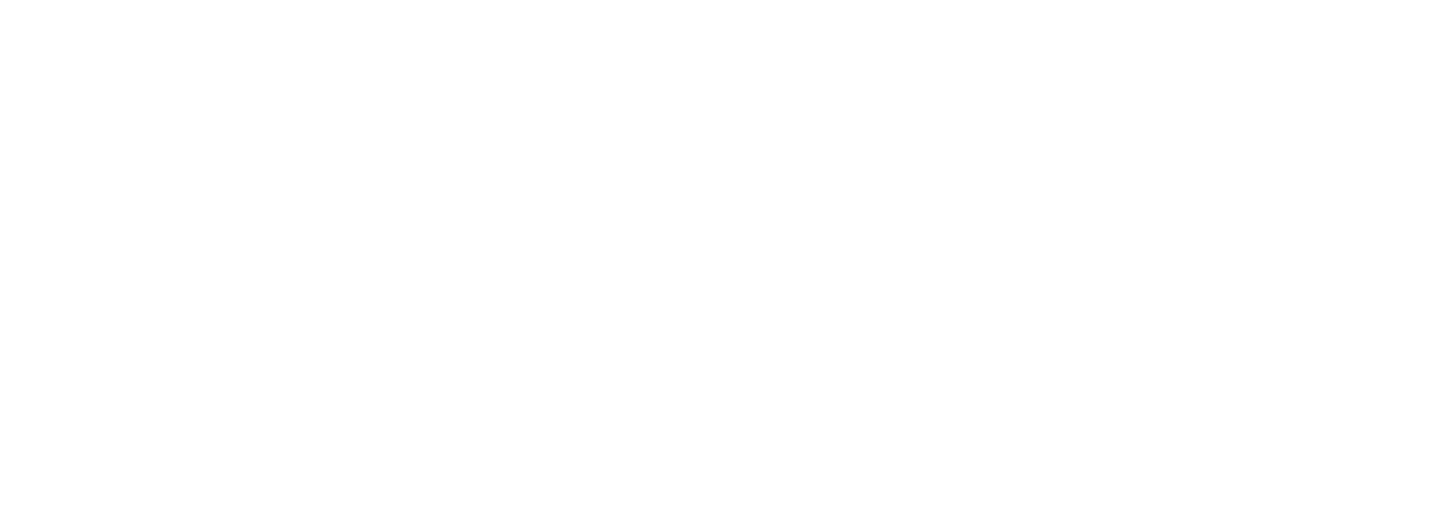

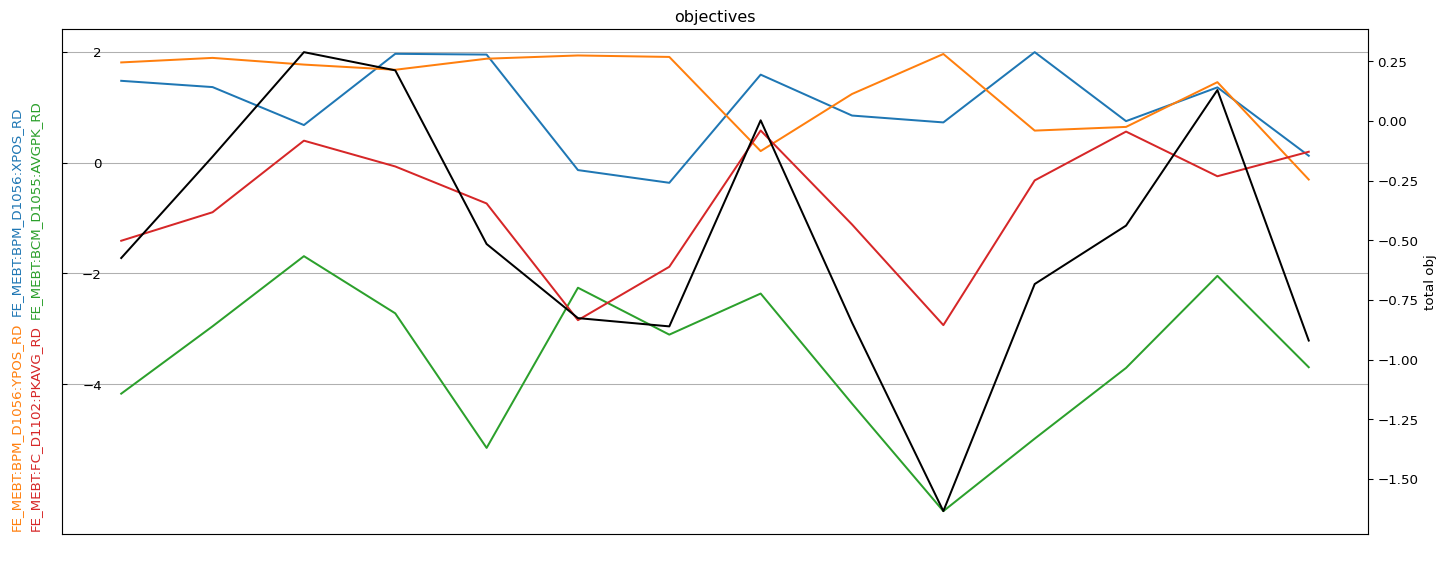

TypeError: optimize() missing 1 required positional argument: 'budget'

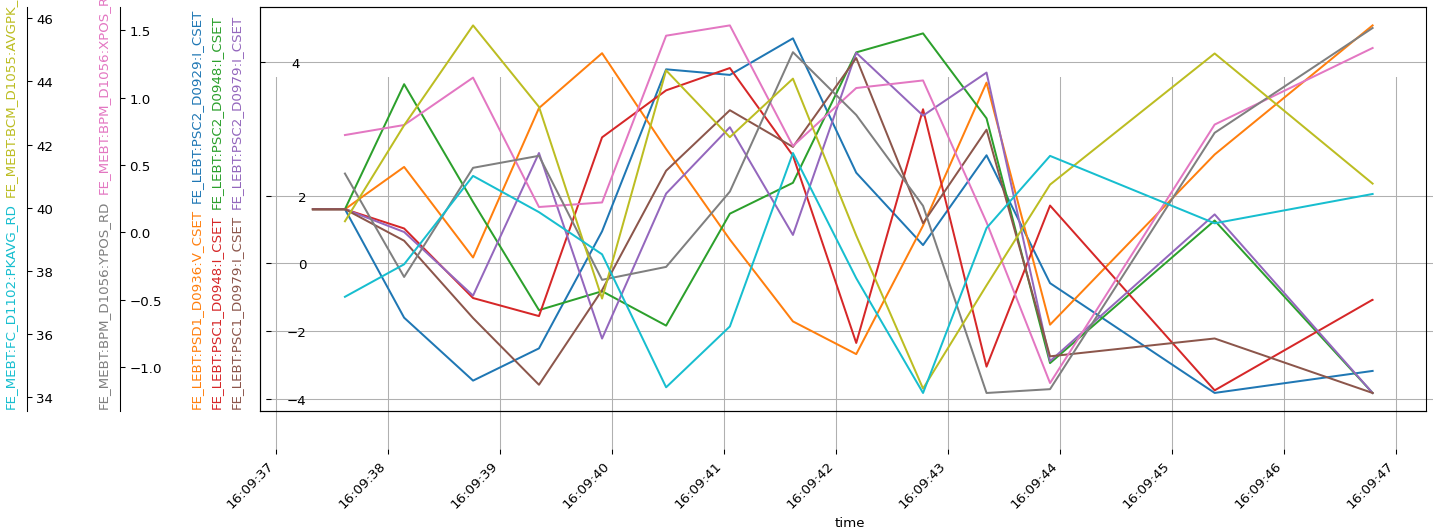

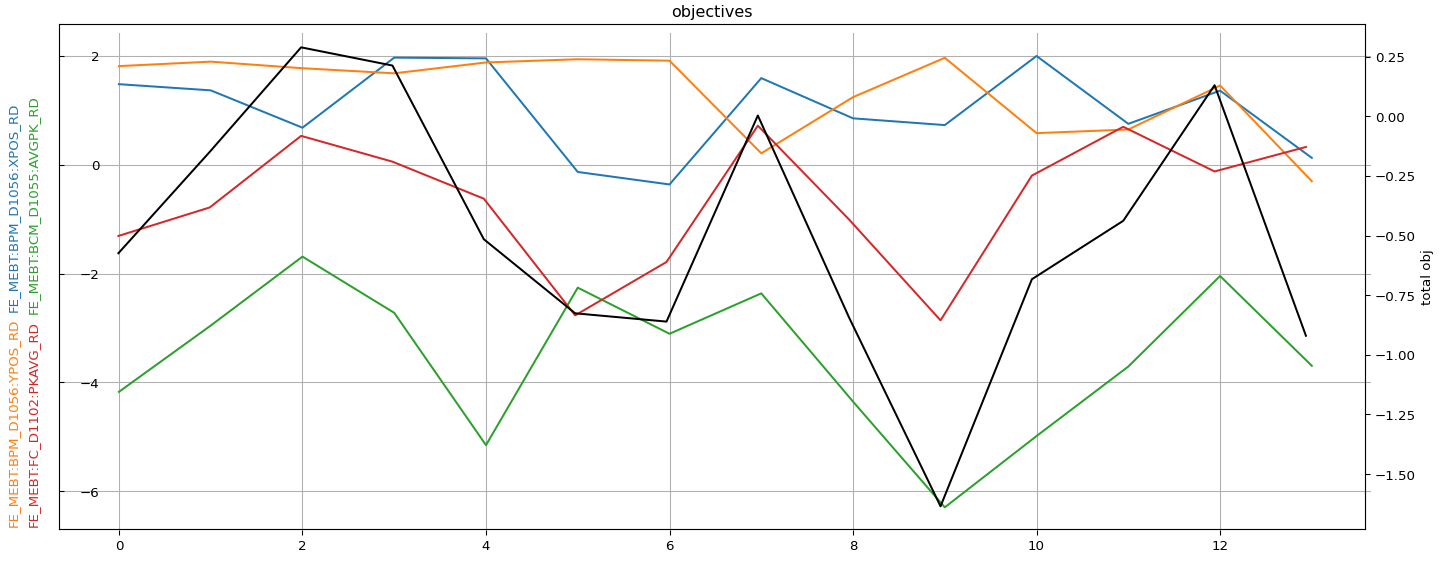

In [14]:
# optimize
ctrBO.init()
ctrBO.optimize()

In [ ]:
ctrBO.optimize_global(10)
ctrBO.optimize_local(10)
ctrBO.fine_tune(4)

In [ ]:
fig,ax = plt.subplots(figsize=(4,2),dpi=96)
ctrBO.bo.plot_obj_history(ax=ax, plot_best_only=True)

### set to best solution 

In [ ]:
x_best,y_best_old = ctrBO.bo.best_sofar()
y_best_new = obj(x_best)
print(x_best,y_best_old[0],y_best_new)   # check if best solution objective value is consistent

# Visualize Surrogate model

In [ ]:
# plot surrogate mean model of the last epoch. Can take long time for decision dim >= 4
bo = ctrBO.bo
from math import ceil
nplot = int(0.5*len(obj.decision_CSETs))
nrow = ceil(0.5*nplot)
fig,ax = plt.subplots(nrow,2,figsize=(8,3*nrow))
for i in range(nrow):
    for j in range(2):
        n = 2*i+j
        if nrow>1:
            ax_ = ax[i,j]
        else:
            ax_ = ax[j]
        if n >= nplot:
            ax_.set_visible(False)
            break
        bo.plot_model_2D_projection(project_maximum=True,
                                    dim_xaxis = 2*n,
                                    dim_yaxis = 2*n+1,
                                    grid_ponits_each_dim = 16,
                                    fig=fig,ax=ax_);
        ax_.set_xlabel(obj.decision_CSETs[2*n  ])
        ax_.set_ylabel(obj.decision_CSETs[2*n+1])
        ax_.legend()
fig.tight_layout()